In [ ]:
# !pip install pandas
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from ast import literal_eval
from matplotlib import pyplot as plt
import seaborn as sns
path = "C:\\Users\\rocha\\Documents\\ANL\\llm-eval\\cu\\results\\org\\"

In [ ]:
data = pd.read_csv("results/combined.csv")
data.head()

,Index,qwen_context_utilization_scores,qwen_all_logprob,qwen_org_logprob,qwen_all_entropy,qwen_org_entropy,qwen_nclaims,qwen_all_prob,qwen_prob_cu_score,qwen_total_cu_score,...,qwen3_org_logprob,qwen3_all_entropy,qwen3_org_entropy,qwen3_nclaims,qwen3_all_prob,qwen3_prob_cu_score,qwen3_total_cu_score,qwen3_cu_score,qwen3_rel_cu_score,qwen3_total_rel_cu_score
0,1,"{'all': ""{'normalized_log_prob': -1.509765625,...",-1.509766,-0.893555,1.150391,0.892578,17,0.220962,"[-0.0006482980973912811, -0.000648298097391281...",0.080612,...,-0.832031,0.898438,0.578613,17,0.236595,"[0.0020703351204636455, 0.0009223957618701428,...",0.072111,0.004242,1.792852,30.478482
1,2,"{'all': ""{'normalized_log_prob': -1.2412109375...",-1.241211,-0.888672,1.108398,0.935547,23,0.289034,"[-0.005700684919617338, 0.0033673481406494843,...",0.092688,...,-0.778320,0.784180,0.549316,23,0.323703,"[-0.006706972477497353, 0.0003159616430136736,...",0.107273,0.004664,1.440840,33.139316
2,3,"{'all': ""{'normalized_log_prob': -1.3984375, '...",-1.398438,-1.010742,1.041992,0.974121,28,0.246983,"[-0.0012089186537749819, -0.003644536999426934...",0.113507,...,-1.032227,0.762207,0.595215,28,0.242916,"[0.004930944076949995, -0.0014275147541077948,...",0.112284,0.004010,1.650830,46.223239
3,4,"{'all': ""{'normalized_log_prob': -1.095703125,...",-1.095703,-0.646484,0.888672,0.679199,26,0.334304,"[0.013120812105471669, -0.001308430687054385, ...",0.390040,...,-0.671875,0.647461,0.410645,26,0.302314,"[0.00901493893602251, 0.0035220647970701235, 0...",0.342779,0.013184,4.360969,113.385191
4,5,"{'all': ""{'normalized_log_prob': -1.51171875, ...",-1.511719,-0.716309,1.001953,0.693848,46,0.220531,"[0.0012883932966614997, 0.003842642547552788, ...",0.079428,...,-0.783203,0.890137,0.399170,46,0.201188,"[0.0023439108675676057, 0.005235435800499844, ...",0.062225,0.001353,0.672363,30.928676


In [ ]:
for model in ["llama", "gemma", "ministral", "qwen", "qwen3"]:
    print(model)
    print(f"Correlation between claims and abstracts log prob: {pearsonr(data[f'{model}_all_logprob'], data[f'{model}_org_logprob'])}")
    #positive correlation, highly statistically significant
    print(f"Correlation between claims and abstracts entropy: {pearsonr(data[f'{model}_all_entropy'], data[f'{model}_org_entropy'])}")
    #positive linear relationship, highly statistically significant

llama
Correlation between claims and abstracts log prob: (0.7736464935860166, 0.0)
Correlation between claims and abstracts entropy: (0.4034736606682363, 3.595176815085798e-79)
gemma
Correlation between claims and abstracts log prob: (0.1930685315288854, 3.0128642444094646e-18)
Correlation between claims and abstracts entropy: (0.18030451892803606, 4.469998168099019e-16)
ministral
Correlation between claims and abstracts log prob: (0.14394732681889416, 9.9833389400611e-11)
Correlation between claims and abstracts entropy: (0.14938544738027, 1.8903490697804617e-11)
qwen
Correlation between claims and abstracts log prob: (0.9369850373418354, 0.0)
Correlation between claims and abstracts entropy: (0.44496083047641477, 7.549505560266313e-98)
qwen3
Correlation between claims and abstracts log prob: (0.9135639216984472, 0.0)
Correlation between claims and abstracts entropy: (0.46006557625466754, 2.538800531733736e-105)


In [ ]:
print(f"Correlation between Llama vs Gemma cu_score: {pearsonr(data['llama_cu_score'], data['gemma_cu_score'])}")
print(f"Correlation between ministral vs Gemma cu_score: {pearsonr(data['ministral_cu_score'], data['gemma_cu_score'])}")
print(f"Correlation between ministral vs llama cu_score: {pearsonr(data['ministral_cu_score'], data['llama_cu_score'])}")
print(f"Correlation between ministral vs qwen cu_score: {pearsonr(data['ministral_cu_score'], data['qwen_cu_score'])}")
print(f"Correlation between qwen vs llama cu_score: {pearsonr(data['qwen_cu_score'], data['llama_cu_score'])}")
print(f"Correlation between qwen vs gemma cu_score: {pearsonr(data['qwen_cu_score'], data['gemma_cu_score'])}")
print(f"Correlation between ministral vs qwen3 cu_score: {pearsonr(data['ministral_cu_score'], data['qwen3_cu_score'])}")
print(f"Correlation between qwen3 vs llama cu_score: {pearsonr(data['qwen3_cu_score'], data['llama_cu_score'])}")
print(f"Correlation between qwen3 vs gemma cu_score: {pearsonr(data['qwen3_cu_score'], data['gemma_cu_score'])}")
print(f"Correlation between qwen3 vs qwen cu_score: {pearsonr(data['qwen3_cu_score'], data['qwen_cu_score'])}")

print()
print()
print(f"Correlation between Llama vs Gemma rel_cu_score: {pearsonr(data['llama_rel_cu_score'], data['gemma_rel_cu_score'])}")
print(f"Correlation between ministral vs Gemma rel_cu_score: {pearsonr(data['ministral_rel_cu_score'], data['gemma_rel_cu_score'])}")
print(f"Correlation between ministral vs llama rel_cu_score: {pearsonr(data['ministral_rel_cu_score'], data['llama_rel_cu_score'])}")
print(f"Correlation between ministral vs qwen rel_cu_score: {pearsonr(data['ministral_rel_cu_score'], data['qwen_rel_cu_score'])}")
print(f"Correlation between qwen vs llama rel_cu_score: {pearsonr(data['qwen_rel_cu_score'], data['llama_rel_cu_score'])}")
print(f"Correlation between qwen vs gemma rel_cu_score: {pearsonr(data['qwen_rel_cu_score'], data['gemma_rel_cu_score'])}")
print(f"Correlation between ministral vs qwen3 rel_cu_score: {pearsonr(data['ministral_rel_cu_score'], data['qwen3_rel_cu_score'])}")
print(f"Correlation between qwen3 vs llama rel_cu_score: {pearsonr(data['qwen3_rel_cu_score'], data['llama_rel_cu_score'])}")
print(f"Correlation between qwen3 vs gemma rel_cu_score: {pearsonr(data['qwen3_rel_cu_score'], data['gemma_rel_cu_score'])}")
print(f"Correlation between qwen3 vs qwen rel_cu_score: {pearsonr(data['qwen3_rel_cu_score'], data['qwen_rel_cu_score'])}")


Correlation between Llama vs Gemma cu_score: (0.0018074139667347347, 0.935617277569457)
Correlation between ministral vs Gemma cu_score: (0.6284147805089348, 3.1235787473838874e-220)
Correlation between ministral vs llama cu_score: (0.03447470788689045, 0.12325593906003822)
Correlation between ministral vs qwen cu_score: (0.013663527805849764, 0.541399511451964)
Correlation between qwen vs llama cu_score: (0.8683186632804233, 0.0)
Correlation between qwen vs gemma cu_score: (-0.008245602544322434, 0.7124778692449157)
Correlation between ministral vs qwen3 cu_score: (-0.019301191666479475, 0.38829349420599046)
Correlation between qwen3 vs llama cu_score: (0.8181581773599613, 0.0)
Correlation between qwen3 vs gemma cu_score: (-0.01890532869157382, 0.3981002611539178)
Correlation between qwen3 vs qwen cu_score: (0.8212929340929298, 0.0)


Correlation between Llama vs Gemma rel_cu_score: (-0.08082144368471975, 0.0002967678082479827)
Correlation between ministral vs Gemma rel_cu_score: (0.0

In [ ]:
# print(data['ministral_cu_score'].describe())
# print(data['gemma_cu_score'].describe())

print("llama")
print(data['llama_cu_score'].describe())
print("qwen")
print(data['qwen_cu_score'].describe())
print("qwen3")
print(data['qwen3_cu_score'].describe())

llama
count    2000.000000
mean        0.003976
std         0.002230
min        -0.000459
25%         0.002424
50%         0.003617
75%         0.005042
max         0.024256
Name: llama_cu_score, dtype: float64
qwen
count    2000.000000
mean        0.004735
std         0.002723
min        -0.001352
25%         0.002822
50%         0.004274
75%         0.006060
max         0.024960
Name: qwen_cu_score, dtype: float64
qwen3
count    2000.000000
mean        0.004170
std         0.002455
min        -0.000991
25%         0.002463
50%         0.003779
75%         0.005435
max         0.022370
Name: qwen3_cu_score, dtype: float64


In [ ]:
# print(data['gemma_rel_cu_score'].describe())
# print(data['ministral_rel_cu_score'].describe())
print("llama")
print(data['llama_rel_cu_score'].describe())
print("qwen")
print(data['qwen_rel_cu_score'].describe())
print("qwen3")
print(data['qwen3_rel_cu_score'].describe())

llama
count    2000.000000
mean        1.635199
std         0.872686
min        -0.168597
25%         1.029224
50%         1.495532
75%         2.068706
max         9.820985
Name: llama_rel_cu_score, dtype: float64
qwen
count    2000.000000
mean        1.904716
std         1.031811
min        -0.405690
25%         1.186566
50%         1.770998
75%         2.421080
max        10.926987
Name: qwen_rel_cu_score, dtype: float64
qwen3
count    2000.000000
mean        1.744415
std         0.957951
min        -0.507054
25%         1.071072
50%         1.615625
75%         2.241967
max         9.630630
Name: qwen3_rel_cu_score, dtype: float64


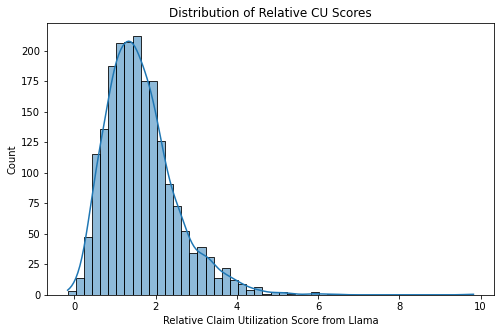

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data_llama['rel_cu_score'], bins=50, kde=True)
plt.xlabel("Relative Claim Utilization Score from Llama")
plt.ylabel("Count")
plt.title("Distribution of Relative CU Scores")
plt.show()
# plt.savefig(path+"results/rel_cu_score_kde.png", dpi=300, bbox_inches='tight')